In [5]:
# SeoulFloating.csv 파일 불러오기
import pandas as pd

people0 = "/content/drive/MyDrive/jaemu/SeoulFloating.csv"
people = pd.read_csv(people0)
people

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


In [6]:
# 필요한 데이터(연령대, 유동인구)만 가져와서 새로운 df 생성
num_df = ['birth_year', 'fp_num']
df = people[num_df]
df

,birth_year,fp_num
0,20,19140
1,20,19950
2,20,25450
3,20,27050
4,20,28880
...,...,...
1084795,40,27620
1084796,40,56560
1084797,50,38960
1084798,60,25420


In [7]:
# 연령대별 유동인구 수의 값을 평균해주었다.
a = df['fp_num'].groupby(df['birth_year']).mean()
age = pd.DataFrame(a)
age.reset_index(inplace=True, drop=False)
age

,birth_year,fp_num
0,20,30098.283739
1,30,33567.581803
2,40,33488.384015
3,50,31392.366316
4,60,20498.490321
5,70,15516.685232


In [8]:
# birth_year 컬럼명을 age로 변경시켰다.
age = age.rename(columns={'birth_year':'age'})
age

,age,fp_num
0,20,30098.283739
1,30,33567.581803
2,40,33488.384015
3,50,31392.366316
4,60,20498.490321
5,70,15516.685232


In [9]:
# PatientInfo.csv 파일 불러오기 및 불필요한 데이터 제거해주기
patient = pd.read_csv('/content/drive/MyDrive/jaemu/PatientInfo.csv')
seoul_patient = patient[patient['province']=='Seoul']
seoul_patient = seoul_patient[seoul_patient['city']!='etc']
seoul_patient = seoul_patient[['age', 'province']]
seoul_patient

,age,province
0,50s,Seoul
1,30s,Seoul
2,50s,Seoul
3,20s,Seoul
4,20s,Seoul
...,...,...
1306,NaN,Seoul
1307,NaN,Seoul
1308,NaN,Seoul
1309,NaN,Seoul


In [10]:
# nan 값을 0s으로 변경시켰다.
import numpy as np
seoul_patient = seoul_patient.replace(np.nan,'0s')
seoul_patient

,age,province
0,50s,Seoul
1,30s,Seoul
2,50s,Seoul
3,20s,Seoul
4,20s,Seoul
...,...,...
1306,0s,Seoul
1307,0s,Seoul
1308,0s,Seoul
1309,0s,Seoul


In [11]:
# 연령을 기준으로 확진자 수를 count
gu_confirm_count = seoul_patient.groupby(['age']).count()

gu_confirm_count

,province
age,
0s,695
10s,25
20s,155
30s,94
40s,76
50s,108
60s,44
70s,24
80s,10


In [12]:
# 더 편리하게 데이터셋을 다루기 위해 index를 reset해주었다.
gu_confirm_count.reset_index(inplace=True, drop=False)
gu_confirm_count

,age,province
0,0s,695
1,10s,25
2,20s,155
3,30s,94
4,40s,76
5,50s,108
6,60s,44
7,70s,24
8,80s,10
9,90s,1


In [13]:
# province의 칼럼명을 counts로 바꿨다.
gu_confirm_count = gu_confirm_count.rename(columns={'province':'counts'})
gu_confirm_count

,age,counts
0,0s,695
1,10s,25
2,20s,155
3,30s,94
4,40s,76
5,50s,108
6,60s,44
7,70s,24
8,80s,10
9,90s,1


In [14]:
# 필요없는 연령대를 제거해주었다. (비교할 데이터가 없기 때문.)
gu_confirm_count = gu_confirm_count.drop([0, 8, 9])
gu_confirm_count

,age,counts
1,10s,25
2,20s,155
3,30s,94
4,40s,76
5,50s,108
6,60s,44
7,70s,24


In [15]:
# age 안에 10s, 20s 등의 값을 정수로 바꿔주었다.
gu_confirm_count.loc[1] = (10, 25)
gu_confirm_count.loc[2] = (20, 155)
gu_confirm_count.loc[3] = (30, 94)
gu_confirm_count.loc[4] = (40, 76)
gu_confirm_count.loc[5] = (50, 108)
gu_confirm_count.loc[6] = (60, 44)
gu_confirm_count.loc[7] = (70, 24)
gu_confirm_count

,age,counts
1,10,25
2,20,155
3,30,94
4,40,76
5,50,108
6,60,44
7,70,24


In [16]:
# DataFrame age와 gu_confirm_count를 age를 기준으로 하나로 합쳐주었다.
age_positive = pd.merge(age, gu_confirm_count, on='age')
age_positive

,age,fp_num,counts
0,20,30098.283739,155
1,30,33567.581803,94
2,40,33488.384015,76
3,50,31392.366316,108
4,60,20498.490321,44
5,70,15516.685232,24


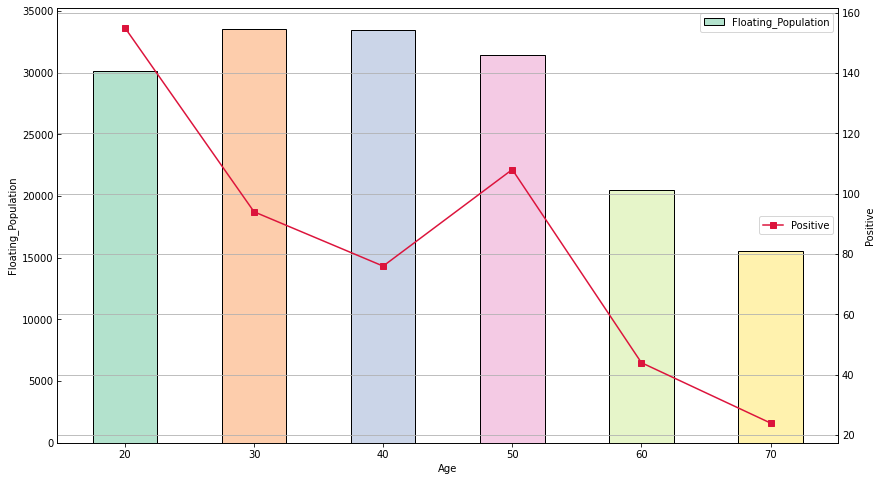

In [18]:
# 서울 연령별 유동인구 수와 확진자 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] =(14,8)
colors = sns.color_palette('Pastel2', 6)
x = age_positive['age']
y1 = age_positive['fp_num']
y2 = age_positive['counts']
fig, ax1 = plt.subplots()
ax1.bar(x, y1, color=colors, width=5,label='Floating_Population', edgecolor='black')
ax1.set_xlabel('Age')
ax1.set_ylabel('Floating_Population')
ax1.tick_params(axis='y', direction='in')
ax2 = ax1.twinx()

ax2.plot(x, y2, '-s', color='#DC143C',label='Positive')
ax2.set_ylabel('Positive')
ax2.tick_params(axis='both', direction='in')
ax1.legend(loc='best')
ax2.legend(loc='right')
plt.grid()
plt.show()